In [6]:
import pandas as pd

df=pd.read_csv("datasets/titanic.csv")
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [7]:
df.drop(['Parents/Children Aboard','Name','Fare'],inplace=True,axis=1)
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard
0,0,3,male,22.0,1
1,1,1,female,38.0,1
2,1,3,female,26.0,0
3,1,1,female,35.0,1
4,0,3,male,35.0,0


In [8]:
df['Sex']=df['Sex'].map({
    'male':1,
    'female':0
})
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard
0,0,3,1,22.0,1
1,1,1,0,38.0,1
2,1,3,0,26.0,0
3,1,1,0,35.0,1
4,0,3,1,35.0,0


In [11]:
X=df.drop(['Survived'],axis=1)
y=df['Survived']
print(X.head())
print(y.head())

   Pclass  Sex   Age  Siblings/Spouses Aboard
0       3    1  22.0                        1
1       1    0  38.0                        1
2       3    0  26.0                        0
3       1    0  35.0                        1
4       3    1  35.0                        0
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

print(x_train.shape," ",x_test.shape," ",y_train.shape," ",y_test.shape)

(709, 4)   (178, 4)   (709,)   (178,)


In [17]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [20]:
y_pred=nb.predict(x_test)
print(y_pred[:5])
print(y_test[:5])

[1 0 0 0 0]
14     0
158    0
762    0
740    1
482    0
Name: Survived, dtype: int64


In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score

print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

cm=confusion_matrix(y_test,y_pred)
print(cm)

0.7808988764044944
0.6666666666666667
[[100  17]
 [ 22  39]]


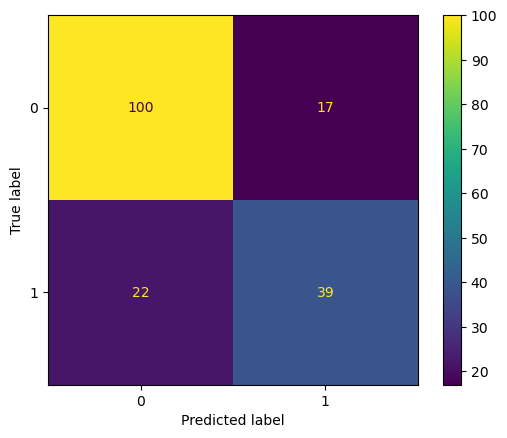

In [25]:
# %matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

graph=ConfusionMatrixDisplay(confusion_matrix=cm)
graph.plot()
